In [7]:
import numpy as np
import sys
sys.path.append('..')
from mlscratch.linear_regression import LinearRegression
from mlscratch.optimization import *


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self,
                 optimizer,
                 learning_rate=0.1,
                 beta=0.9,
                 beta2=0.9,
                 velocity=0,
                 sqr_velocity=0,
                 epsilon=0.000001):

        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.beta = beta
        self.beta2 = beta2
        self.velocity = velocity
        self.epsilon = epsilon
        self.sqr_velocity = sqr_velocity

    def train(self, x, y, epochs=10, batch_size=32):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)

        for _ in range(1, epochs):
            avg_batch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            self.theta_array, self.velocity, self.sqr_velocity = \
                self.optimizer(theta_array=self.theta_array,
                               learning_rate=self.learning_rate,
                               beta1=self.beta,
                               beta2=self.beta2,
                               velocity=self.velocity,
                               sqr_velocity=self.sqr_velocity,
                               gradient=avg_batch_partial_grads,
                               epsilon=self.epsilon)
                        
    def validate(self, x, y):
        self._check_theta_exists('validating')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists('predicting')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x

    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss

    def _check_theta_exists(self, phrase):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before {}}.".format(phrase))


In [8]:
linear_regression = LinearRegression(optimizer=adam)

In [9]:
x = np.array(np.arange(100))
delta = np.random.uniform(0,10, size=(100,))
y = (.4 * x +1 + delta)

In [10]:
linear_regression.train(x, y, epochs=2000)

In [11]:
y_predicted = linear_regression.predict(x)

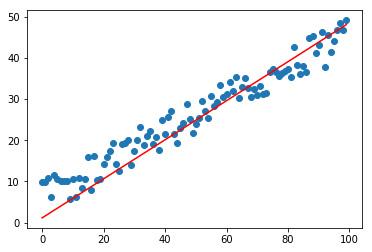

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()